<h1> CLUSTERING FOR DIVERSIFICATION ANALYSIS </h1>


<b>In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd


In [2]:
import re
filenames = glob.glob('Module6/*.csv')
def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$',     '',    filename)
file=[]
for f in filenames:
    file.append(getName(f))
final_list=[]
for f in file:
    f=f.lstrip('Module6\\')
    final_list.append(f)
    
len(final_list)

30

In [3]:

def read_csv( filename ):
    if isinstance(filename, pd.DataFrame): return filename  # OPTIMIZATION: allow passthrough of existing dataframe

    dataframe = pd.read_csv( filename, parse_dates=['Date'] )
    dataframe.set_index( 'Date', inplace=True )
    return dataframe



filenames = glob.glob('Module6/*.csv')
portfolio_df=pd.DataFrame()
portfolio_df.reset_index()
def define_df(file_list,filenames):
    i=0
    for file in file_list:
        portfolio_df[file]=pd.read_csv(filenames[i])['Close Price']
        data=pd.read_csv(filenames[i],parse_dates=['Date'])        
        i=i+1
    return portfolio_df
portfolio_df=define_df(final_list,filenames)  
portfolio_df


,ADANIPORTS,ADANIPOWER,APOLLOTYRE,ASHOKA,AXISBANK,BERGEPAINT,BOMDYEING,CENTURYPLY,CIPLA,FORTIS,...,INDTREE,PNB,PVR,RAYMOND,RELIANCE,SUNPHARMA,TATAPOWER,TCS,TITAN,VOLTAS
0,356.20,30.25,231.90,216.05,500.10,259.5,82.20,266.65,569.00,205.25,...,509.45,166.80,1524.95,772.80,1344.10,654.45,83.55,2365.10,483.65,431.85
1,354.50,32.85,234.40,214.90,501.50,261.5,83.40,266.10,565.60,207.90,...,511.30,174.15,1539.00,785.00,1356.30,652.35,83.85,2429.15,488.30,432.45
2,348.55,33.10,237.35,217.00,502.80,260.9,82.25,264.85,562.35,205.90,...,506.35,165.05,1530.30,783.65,1353.10,650.90,85.35,2455.35,481.75,430.20
3,347.90,31.90,232.65,209.65,492.00,254.1,78.95,260.35,560.10,196.85,...,492.90,158.50,1515.05,746.95,1327.35,653.95,83.75,2536.20,471.65,414.10
4,349.45,32.40,234.65,206.25,501.70,247.8,77.15,254.05,564.95,203.55,...,497.50,155.20,1513.55,723.10,1318.85,653.15,84.15,2507.15,471.15,415.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,371.90,41.35,191.75,115.45,741.85,303.7,119.35,161.30,563.35,135.20,...,980.50,83.95,1780.10,807.10,1343.50,448.20,64.35,2215.40,1082.85,576.65
491,369.80,40.95,185.30,115.30,735.50,302.3,117.75,160.50,557.95,133.60,...,980.45,84.25,1748.50,805.30,1299.45,439.15,64.50,2132.00,1086.50,574.10
492,363.90,41.45,190.95,117.45,731.00,301.6,117.05,160.50,558.00,133.00,...,975.35,86.25,1758.45,804.40,1256.45,439.35,64.40,2157.85,1088.70,580.05
493,372.55,38.45,186.20,117.15,735.05,299.5,109.85,162.85,557.75,131.90,...,979.10,79.80,1715.40,779.35,1251.15,437.75,63.80,2151.95,1104.45,572.20


<h3> 6.2 </h3>

In [4]:
def normalize_weights( weights ):
    for i in range(0,5):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio_df.shape[1])
    return normalize_weights( weights )

random_weights()



array([0.04295704, 0.004995  , 0.06693307, 0.03596404, 0.06893107,
       0.06893107, 0.06493506, 0.02097902, 0.05794206, 0.01298701,
       0.04795205, 0.03496503, 0.00799201, 0.02997003, 0.02997003,
       0.000999  , 0.04395604, 0.03496503, 0.04895105, 0.01098901,
       0.01398601, 0.01998002, 0.02097902, 0.03696304, 0.00799201,
       0.01298701, 0.04595405, 0.01098901, 0.04595405, 0.04795205])

In [5]:
working_days_per_year    = 252
portfolio_summary = pd.DataFrame()
portfolio_summary['returns']    = portfolio_df.pct_change().mean() * working_days_per_year
portfolio_summary['volatility'] = portfolio_df.pct_change().std()  * np.sqrt( working_days_per_year )
portfolio_summary


,returns,volatility
ADANIPORTS,0.060376,0.309436
ADANIPOWER,0.304655,0.609913
APOLLOTYRE,-0.064172,0.310130
ASHOKA,-0.208086,0.442525
AXISBANK,0.232722,0.277636
BERGEPAINT,0.108714,0.267396
BOMDYEING,0.326958,0.602258
CENTURYPLY,-0.181969,0.374888
CIPLA,0.019919,0.253941
FORTIS,-0.145528,0.421213


<h3> 6.3 </h3>

Text(0, 0.5, 'inertia')

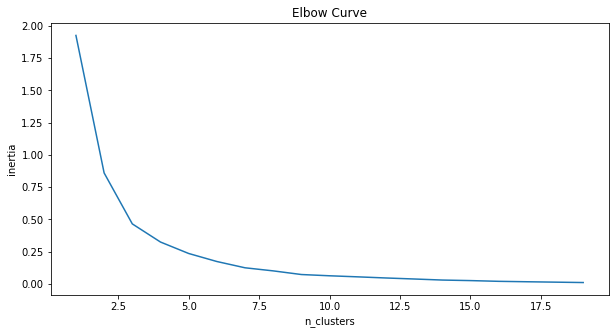

In [6]:
from sklearn.cluster import KMeans
elbow_curve = [ None ] + [KMeans(n_clusters=n, random_state=0).fit(portfolio_summary).inertia_ for n in range(1,20) ]

fig, axes = plt.subplots(1,1, figsize=(10,5))
axes.plot( elbow_curve )
axes.set_title('Elbow Curve')    
axes.set_xlabel('n_clusters')
axes.set_ylabel('inertia')


<function matplotlib.pyplot.show(*args, **kw)>

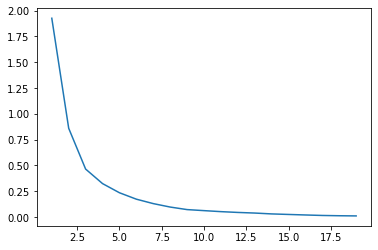

In [7]:
from sklearn.cluster import KMeans
kn = range(1,20)
li = []
for i in kn:
    m = KMeans(n_clusters = i)
    m.fit_predict(portfolio_summary[["returns", "volatility"]])
    a = m.inertia_
    li.append(a)

plt.plot(kn,li)
plt.show


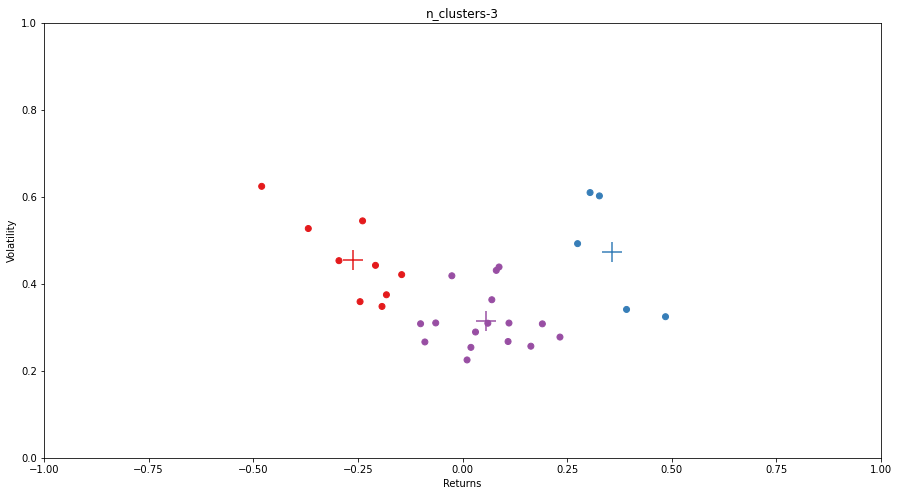

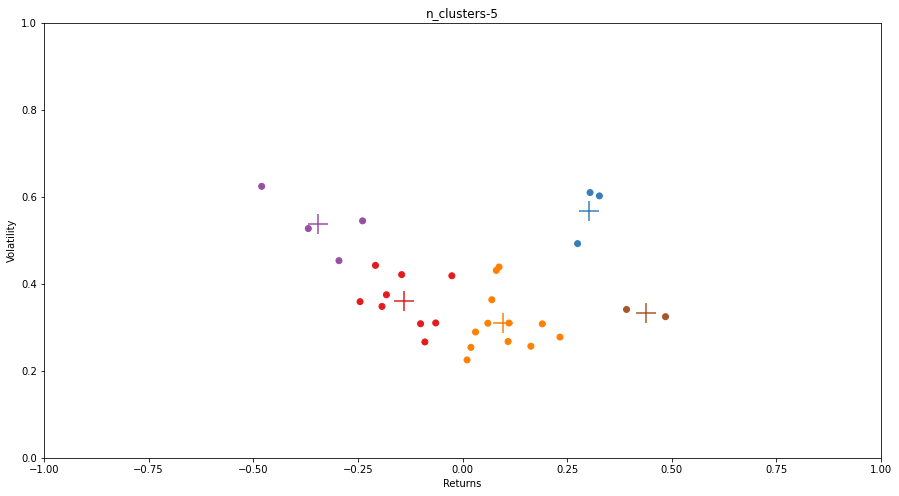

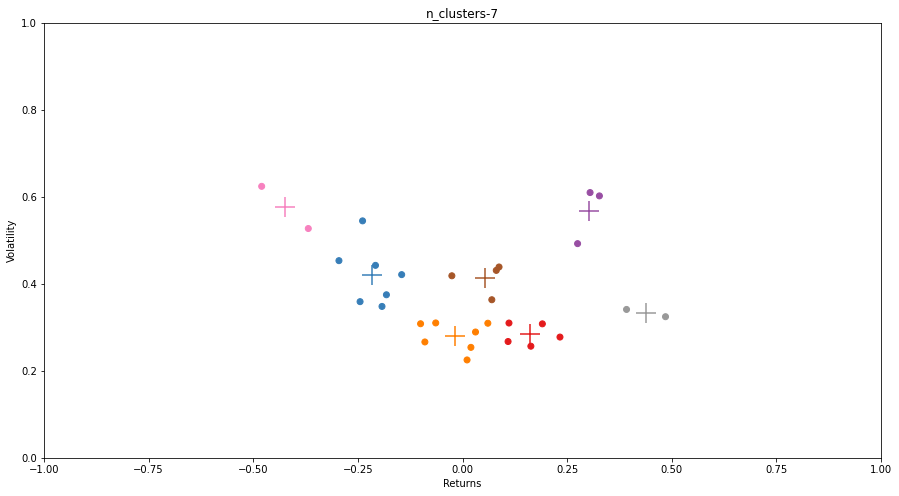

In [8]:
from matplotlib import cm

cmap = cm.get_cmap('Set1') # Colour map (there are many others)
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)
portfolio_kmeans={}

for i in [3,5,7]:
    plt.figure(figsize = (15,8))
    portfolio_kmeans[i]      = KMeans(n_clusters=i, random_state=0).fit(portfolio_summary)
    portfolio_kmeans_predict = portfolio_kmeans[i].predict(portfolio_summary)

    plt.scatter( portfolio_summary.returns, portfolio_summary.volatility, c=get_color(portfolio_kmeans_predict))
    plt.ylim(0, 1.0)
    plt.xlim(-1.0, 1.0)
    plt.xlabel('Returns')
    plt.ylabel('Volatility')
    plt.title('n_clusters-'+str(i))
    # Mark Cluster Centers
    for i, coords in enumerate( portfolio_kmeans[i].cluster_centers_ ):
        plt.scatter( coords[0], coords[1], s=400, marker='+', c=[ get_color(i) ] )
    plt.show()


<h3> 6.4 </h3>

In [9]:
portfolio_summary['stock']=portfolio_summary.index
for i in [3,5,7]:
    portfolio_summary['cluster_'+str(i)] = portfolio_kmeans[i].predict( portfolio_summary[['returns', 'volatility']] )
# FINAL DATAFRAME - 
portfolio_summary


,returns,volatility,stock,cluster_3,cluster_5,cluster_7
ADANIPORTS,0.060376,0.309436,ADANIPORTS,2,3,3
ADANIPOWER,0.304655,0.609913,ADANIPOWER,1,1,2
APOLLOTYRE,-0.064172,0.310130,APOLLOTYRE,2,0,3
ASHOKA,-0.208086,0.442525,ASHOKA,0,0,1
AXISBANK,0.232722,0.277636,AXISBANK,2,3,0
BERGEPAINT,0.108714,0.267396,BERGEPAINT,2,3,0
BOMDYEING,0.326958,0.602258,BOMDYEING,1,1,2
CENTURYPLY,-0.181969,0.374888,CENTURYPLY,0,0,1
CIPLA,0.019919,0.253941,CIPLA,2,3,3
FORTIS,-0.145528,0.421213,FORTIS,0,0,1


In [10]:
groups = portfolio_summary.groupby('cluster_3')
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}
cluster_names = {0: 'c1', 
                 1: 'c2', 
                 2: 'c3'}

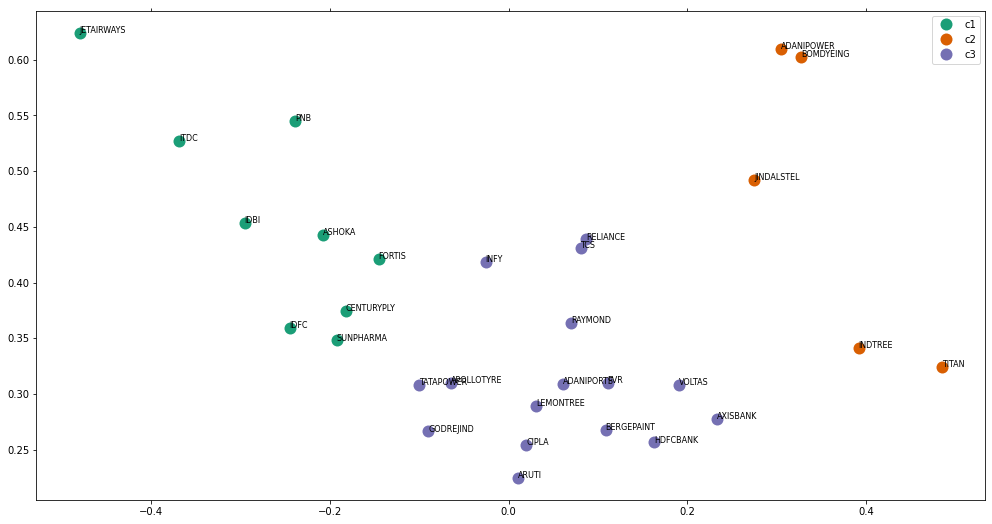

In [11]:
fig, ax = plt.subplots(figsize=(17, 9)) 
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.returns, group.volatility, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  
portfolio_summary.reset_index(inplace=True)

for i in range(len(portfolio_summary)):
    ax.text(portfolio_summary.loc[i]['returns'], portfolio_summary.loc[i]['volatility'], portfolio_summary.loc[i]['stock'], size=8) 

In [12]:
portfolio_summary.drop(labels=['stock'],inplace=True,axis=1)
portfolio_summary.set_index('index')

,returns,volatility,cluster_3,cluster_5,cluster_7
index,,,,,
ADANIPORTS,0.060376,0.309436,2,3,3
ADANIPOWER,0.304655,0.609913,1,1,2
APOLLOTYRE,-0.064172,0.310130,2,0,3
ASHOKA,-0.208086,0.442525,0,0,1
AXISBANK,0.232722,0.277636,2,3,0
BERGEPAINT,0.108714,0.267396,2,3,0
BOMDYEING,0.326958,0.602258,1,1,2
CENTURYPLY,-0.181969,0.374888,0,0,1
CIPLA,0.019919,0.253941,2,3,3
